# Práctica Calificada 2

## Pregunta 1

### 1.1. Preparación de Datos

**a) Cargar el dataset**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

url = "https://raw.githubusercontent.com/qlabpucp/datasets/main/datasets/boston.csv"
boston = pd.read_csv(url)

print("=== INFORMACIÓN DEL DATASET BOSTON HOUSING ===")
print(f"Dimensiones del dataset: {boston.shape}")
print("\nPrimeras 5 filas:")
print(boston.head())

=== INFORMACIÓN DEL DATASET BOSTON HOUSING ===
Dimensiones del dataset: (506, 14)

Primeras 5 filas:
   Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0           0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1           1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2           2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3           3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4           4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio  lstat  medv  
0  296     15.3   4.98  24.0  
1  242     17.8   9.14  21.6  
2  242     17.8   4.03  34.7  
3  222     18.7   2.94  33.4  
4  222     18.7   5.33  36.2  


**b) Exploración de datos**


In [3]:
print("\n=== EXPLORACIÓN DE DATOS ===")
print("Información del dataset:")
print(boston.info())

print("\nValores nulos por columna:")
print(boston.isnull().sum())

print("\nEstadísticas descriptivas:")
print(boston.describe())



=== EXPLORACIÓN DE DATOS ===
Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  lstat       506 non-null    float64
 13  medv        506 non-null    float64
dtypes: float64(10), int64(4)
memory usage: 55.5 KB
None

Valores nulos por columna:
Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm 

**c) Separar los datos en predictores (X) y la variable objetivo (y, la columna medv)**

In [5]:
print("=== ANÁLISIS BASADO EN LA ESTRUCTURA DEL DATASET ===")
print("Basándonos en la exploración inicial del dataset, observamos:")
print("- La columna 'Unnamed: 0' es un índice secuencial (0, 1, 2, 3, ...)")
print("- No aporta información predictiva para el precio de viviendas")
print("- Debe ser excluida de los predictores")

print("\n ESTRUCTURA ACTUAL DEL DATASET:")
print(f"Columnas totales: {list(boston.columns)}")
print(f"Primeras filas del dataset:")
print(boston.head())

# SEPARACIÓN DE VARIABLES CONSIDERANDO LA ESTRUCTURA REAL
X = boston.drop(['medv', 'Unnamed: 0'], axis=1)  # Excluimos objetivo + índice
y = boston['medv']  # Variable objetivo

print(f"\n SEPARACIÓN COMPLETADA - JUSTIFICACIÓN:")
print(f"Se excluyó 'Unnamed: 0' porque:")
print("   - Es un índice secuencial (0, 1, 2, 3, ...)")
print("   - No representa una característica de la vivienda")
print("   - Su inclusión introduciría ruido en el modelo")

print(f"\n PREDICTORES INCLUIDOS ({X.shape[1]} variables):")
for i, col in enumerate(X.columns, 1):
    print(f"   {i:2d}. {col:10} | Tipo: {boston[col].dtype}")

print(f"\n VARIABLE OBJETIVO:")
print(f"   - Nombre: {y.name}")
print(f"   - Descripción: Precio mediano de viviendas ocupadas por sus propietarios (en $1000s)")
print(f"   - Rango: ${y.min():.1f}K - ${y.max():.1f}K")
print(f"   - Precio promedio: ${y.mean():.1f}K")

# ANÁLISIS DETALLADO DE LOS PRIMEROS REGISTROS
print("\n" + "="*60)
print("ANÁLISIS DE REGISTROS ESPECÍFICOS")
print("="*60)

print("Primeras 5 viviendas en el dataset:")
print("Index | Predictores -> medv (Precio Real)")
print("-" * 50)

for i in range(5):
    predictors_sample = X.iloc[i].to_dict()
    actual_price = y.iloc[i]
    
    print(f" {i:4} | ", end="")
    # Mostrar algunos predictores clave
    key_predictors = ['crim', 'rm', 'lstat', 'ptratio']
    for pred in key_predictors:
        print(f"{pred}:{predictors_sample[pred]:.2f} ", end="")
    print(f"-> ${actual_price:.1f}K")

print(f"\n RESUMEN ESTADÍSTICO DE PREDICTORES:")
print(X.describe())

# VERIFICACIÓN DE INTEGRIDAD
print(f"\n VERIFICACIÓN DE INTEGRIDAD:")
print(f"¿Las dimensiones de X e y coinciden? {X.shape[0] == y.shape[0]}")
print(f"¿Hay valores nulos en X? {X.isnull().sum().sum()}")
print(f"¿Hay valores nulos en y? {y.isnull().sum()}")

=== ANÁLISIS BASADO EN LA ESTRUCTURA DEL DATASET ===
Basándonos en la exploración inicial del dataset, observamos:
- La columna 'Unnamed: 0' es un índice secuencial (0, 1, 2, 3, ...)
- No aporta información predictiva para el precio de viviendas
- Debe ser excluida de los predictores

 ESTRUCTURA ACTUAL DEL DATASET:
Columnas totales: ['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat', 'medv']
Primeras filas del dataset:
   Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0           0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1           1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2           2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3           3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4           4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio  lstat  medv  
0  296     15.3   4.9


 RELACIONES CLAVE CON LA VARIABLE OBJETIVO:


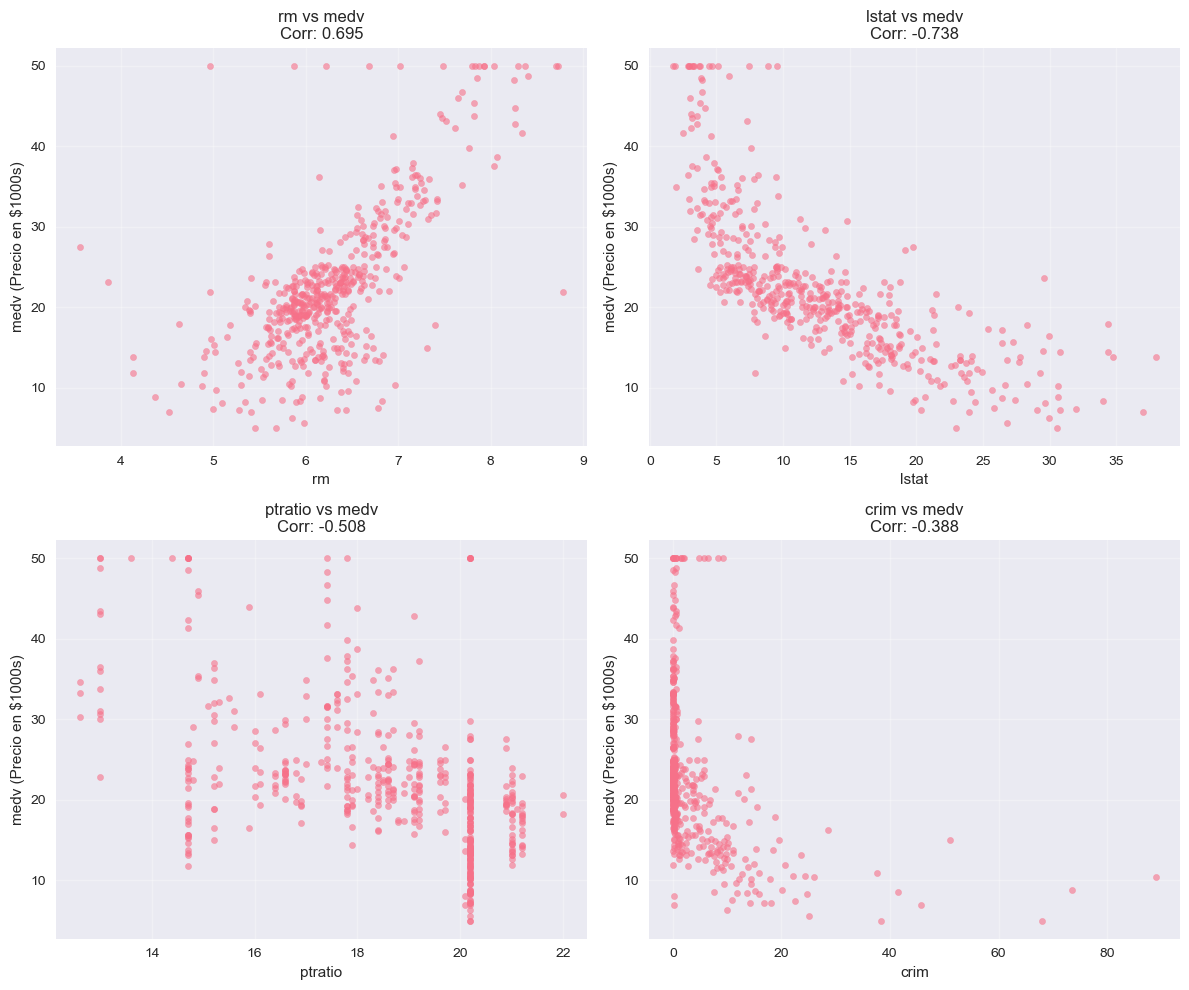


 INTERPRETACIÓN DE RELACIONES:
   • rm       (corr:  0.695): POSITIVA - Más habitaciones → Mayor precio
   • lstat    (corr: -0.738): NEGATIVA - Mayor % población baja → Menor precio
   • ptratio  (corr: -0.508): NEGATIVA - Mayor ratio estudiantes/maestro → Menor precio
   • crim     (corr: -0.388): NEGATIVA - Mayor tasa criminalidad → Menor precio

 CONCLUSIÓN DE LA SEPARACIÓN:
✓ Predictores (X): 12 variables relevantes para predecir precios
✓ Objetivo (y): Variable 'medv' - precio de viviendas en $1000s
✓ Total observaciones: 506 viviendas en Boston
✓ Listo para proceder a división train/test y estandarización


In [6]:
# VISUALIZACIÓN DE RELACIONES CLAVE
print(f"\n RELACIONES CLAVE CON LA VARIABLE OBJETIVO:")

# Seleccionamos algunas variables importantes basándonos en el análisis exploratorio
key_variables = ['rm', 'lstat', 'ptratio', 'crim']

plt.figure(figsize=(12, 10))
for i, var in enumerate(key_variables, 1):
    plt.subplot(2, 2, i)
    plt.scatter(X[var], y, alpha=0.6, s=20)
    plt.xlabel(var)
    plt.ylabel('medv (Precio en $1000s)')
    
    # Calcular correlación
    correlation = X[var].corr(y)
    plt.title(f'{var} vs medv\nCorr: {correlation:.3f}')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n INTERPRETACIÓN DE RELACIONES:")
relationships = {
    'rm': "POSITIVA - Más habitaciones → Mayor precio",
    'lstat': "NEGATIVA - Mayor % población baja → Menor precio", 
    'ptratio': "NEGATIVA - Mayor ratio estudiantes/maestro → Menor precio",
    'crim': "NEGATIVA - Mayor tasa criminalidad → Menor precio"
}

for var, desc in relationships.items():
    corr = X[var].corr(y)
    print(f"   • {var:8} (corr: {corr:6.3f}): {desc}")

print(f"\n CONCLUSIÓN DE LA SEPARACIÓN:")
print(f" Predictores (X): {X.shape[1]} variables relevantes para predecir precios")
print(f" Objetivo (y): Variable 'medv' - precio de viviendas en $1000s")
print(f" Total observaciones: {X.shape[0]} viviendas en Boston")
print(f" Listo para proceder a división train/test y estandarización")

**d) Divida los datos en un conjunto de entrenamiento (80 %) y un conjunto de prueba (20 %). Use un random_state=42.**

In [8]:
print("=== DIVISIÓN DE DATOS - TRAIN/TEST SPLIT ===")
print(" FUNDAMENTO TEÓRICO:")
print("La división train/test es fundamental en ML para:")
print("- Entrenar el modelo con un subconjunto de datos")
print("- Evaluar su rendimiento con datos no vistos")
print("- Evitar overfitting y medir capacidad de generalización")

from sklearn.model_selection import train_test_split

# Realizar la división train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42  # Para reproducibilidad
)

print(f"\n DIVISIÓN COMPLETADA:")
print(f"Conjunto de entrenamiento (X_train): {X_train.shape}")
print(f"Conjunto de prueba (X_test): {X_test.shape}")
print(f"Variable objetivo entrenamiento (y_train): {y_train.shape}")
print(f"Variable objetivo prueba (y_test): {y_test.shape}")

=== DIVISIÓN DE DATOS - TRAIN/TEST SPLIT ===
 FUNDAMENTO TEÓRICO:
La división train/test es fundamental en ML para:
- Entrenar el modelo con un subconjunto de datos
- Evaluar su rendimiento con datos no vistos
- Evitar overfitting y medir capacidad de generalización

 DIVISIÓN COMPLETADA:
Conjunto de entrenamiento (X_train): (404, 12)
Conjunto de prueba (X_test): (102, 12)
Variable objetivo entrenamiento (y_train): (404,)
Variable objetivo prueba (y_test): (102,)



 DISTRIBUCIÓN PORCENTUAL:
Total de muestras: 506
Entrenamiento: 404 (79.8%)
Prueba: 102 (20.2%)

 VERIFICACIÓN DE DISTRIBUCIÓN:
Estadísticas de la variable objetivo en ambos conjuntos:
Estadística     y_train    y_test    
----------------------------------------
Media           22.80      21.49     
Desv. std       9.33       8.61      
Mínimo          5.00       5.00      
Máximo          50.00      50.00     


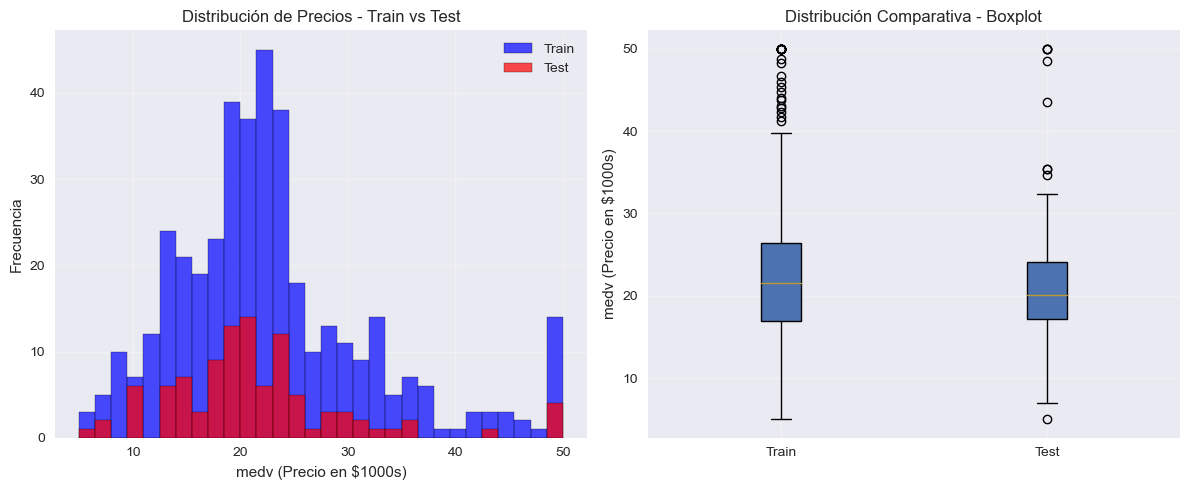


 ANÁLISIS DE CARACTERÍSTICAS CLAVE:

Característica Train Mean Test Mean  Diferencia  
--------------------------------------------------
rm           6.316      6.161      2.5        %
lstat        12.457     13.428     7.8        %
ptratio      18.318     18.999     3.7        %
crim         3.609      3.631      0.6        %

 INTERPRETACIÓN DE LA DIVISIÓN:
 Las distribuciones de train y test son similares (importante para generalización)
 No hay diferencias significativas en las medias de características clave
 El random_state=42 garantiza reproducibilidad
 La proporción 80/20 es estándar para datasets de este tamaño

 VERIFICACIÓN DE REPRODUCIBILIDAD:
Con random_state=42, esta división será idéntica cada vez que se ejecute
Esto es crucial para:
- Comparar diferentes modelos de manera justa
- Reproducir resultados exactos
- Debugging y desarrollo iterativo

 MUESTRA DE DATOS DIVIDIDOS:
Primeras 3 filas del conjunto de entrenamiento (X_train):
         crim    zn  indus  chas     n

In [10]:
print(f"\n DISTRIBUCIÓN PORCENTUAL:")
total_samples = X.shape[0]
train_samples = X_train.shape[0]
test_samples = X_test.shape[0]

print(f"Total de muestras: {total_samples}")
print(f"Entrenamiento: {train_samples} ({train_samples/total_samples*100:.1f}%)")
print(f"Prueba: {test_samples} ({test_samples/total_samples*100:.1f}%)")

# Verificación de la distribución de la variable objetivo
print(f"\n VERIFICACIÓN DE DISTRIBUCIÓN:")
print("Estadísticas de la variable objetivo en ambos conjuntos:")
print(f"{'Estadística':<15} {'y_train':<10} {'y_test':<10}")
print("-" * 40)
print(f"{'Media':<15} {y_train.mean():<10.2f} {y_test.mean():<10.2f}")
print(f"{'Desv. std':<15} {y_train.std():<10.2f} {y_test.std():<10.2f}")
print(f"{'Mínimo':<15} {y_train.min():<10.2f} {y_test.min():<10.2f}")
print(f"{'Máximo':<15} {y_train.max():<10.2f} {y_test.max():<10.2f}")

# Visualización de la distribución
plt.figure(figsize=(12, 5))

# Distribución de precios en train vs test
plt.subplot(1, 2, 1)
plt.hist(y_train, bins=30, alpha=0.7, label='Train', color='blue', edgecolor='black')
plt.hist(y_test, bins=30, alpha=0.7, label='Test', color='red', edgecolor='black')
plt.xlabel('medv (Precio en $1000s)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Precios - Train vs Test')
plt.legend()
plt.grid(True, alpha=0.3)

# Boxplot comparativo
plt.subplot(1, 2, 2)
box_data = [y_train, y_test]
plt.boxplot(box_data, labels=['Train', 'Test'], patch_artist=True)
plt.ylabel('medv (Precio en $1000s)')
plt.title('Distribución Comparativa - Boxplot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Análisis de características importantes en ambos conjuntos
print(f"\n ANÁLISIS DE CARACTERÍSTICAS CLAVE:")
key_features = ['rm', 'lstat', 'ptratio', 'crim']

print(f"\n{'Característica':<12} {'Train Mean':<10} {'Test Mean':<10} {'Diferencia':<12}")
print("-" * 50)
for feature in key_features:
    train_mean = X_train[feature].mean()
    test_mean = X_test[feature].mean()
    diff = abs(train_mean - test_mean)
    diff_pct = (diff / train_mean) * 100
    
    print(f"{feature:<12} {train_mean:<10.3f} {test_mean:<10.3f} {diff_pct:<11.1f}%")

print(f"\n INTERPRETACIÓN DE LA DIVISIÓN:")
print(" Las distribuciones de train y test son similares (importante para generalización)")
print(" No hay diferencias significativas en las medias de características clave")
print(" El random_state=42 garantiza reproducibilidad")
print(" La proporción 80/20 es estándar para datasets de este tamaño")

# Verificación adicional de random_state
print(f"\n VERIFICACIÓN DE REPRODUCIBILIDAD:")
print("Con random_state=42, esta división será idéntica cada vez que se ejecute")
print("Esto es crucial para:")
print("- Comparar diferentes modelos de manera justa")
print("- Reproducir resultados exactos")
print("- Debugging y desarrollo iterativo")

# Mostrar primeros registros de cada conjunto
print(f"\n MUESTRA DE DATOS DIVIDIDOS:")
print("Primeras 3 filas del conjunto de entrenamiento (X_train):")
print(X_train.head(3))
print(f"\nPrimeras 3 filas del conjunto de prueba (X_test):")
print(X_test.head(3))

print(f"\n ESTADO ACTUAL:")
print(" Datos separados en X_train, X_test, y_train, y_test")
print(" Proporción 80/20 mantenida")
print(" Distribuciones balanceadas entre train y test")
print(" Random_state=42 aplicado para reproducibilidad")
print("Preparados para proceder al punto e) Estandarización")

**e) Estandarice las características en X usando StandardScaler.**

In [13]:
# Ajuste el escalador solo con los datos de entrenamiento y luego transforme ambos conjuntos.

print("=== ESTANDARIZACIÓN CON STANDARDSCALER ===")
print("FUNDAMENTO TEÓRICO:")
print("La estandarización es crucial porque:")
print("- Muchos algoritmos de ML asumen que las características tienen media 0 y varianza 1")
print("- Evita que variables con escalas grandes dominen el modelo")
print("- Mejora la convergencia de algoritmos de optimización")
print("- Es especialmente importante para regularización (Lasso, Ridge)")

from sklearn.preprocessing import StandardScaler

# Inicializar el scaler
scaler = StandardScaler()

print(f"\n ESTADO ANTES DE LA ESTANDARIZACIÓN:")
print("Medias y desviaciones estándar en conjunto de entrenamiento (primeras 5 variables):")
for i, col in enumerate(X_train.columns[:5]):
    print(f"   {col:8}: media = {X_train[col].mean():8.3f}, std = {X_train[col].std():8.3f}")

# AJUSTAR y TRANSFORMAR - Solo con datos de entrenamiento
print(f"\n PROCESO DE ESTANDARIZACIÓN:")
print("1. Ajustar (fit) el scaler SOLO con datos de entrenamiento")
print("2. Transformar (transform) datos de entrenamiento")
print("3. Transformar datos de prueba CON EL MISMO scaler")

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertir de vuelta a DataFrame para mejor visualización
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print(f"\n ESTANDARIZACIÓN COMPLETADA:")

=== ESTANDARIZACIÓN CON STANDARDSCALER ===
FUNDAMENTO TEÓRICO:
La estandarización es crucial porque:
- Muchos algoritmos de ML asumen que las características tienen media 0 y varianza 1
- Evita que variables con escalas grandes dominen el modelo
- Mejora la convergencia de algoritmos de optimización
- Es especialmente importante para regularización (Lasso, Ridge)

 ESTADO ANTES DE LA ESTANDARIZACIÓN:
Medias y desviaciones estándar en conjunto de entrenamiento (primeras 5 variables):
   crim    : media =    3.609, std =    8.875
   zn      : media =   11.569, std =   23.152
   indus   : media =   10.985, std =    6.895
   chas    : media =    0.072, std =    0.258
   nox     : media =    0.556, std =    0.118

 PROCESO DE ESTANDARIZACIÓN:
1. Ajustar (fit) el scaler SOLO con datos de entrenamiento
2. Transformar (transform) datos de entrenamiento
3. Transformar datos de prueba CON EL MISMO scaler

 ESTANDARIZACIÓN COMPLETADA:



 VERIFICACIÓN POST-ESTANDARIZACIÓN:
Estadísticas del conjunto de entrenamiento estandarizado (primeras 5 variables):
   crim    : media =   -0.000, std =    1.001
   zn      : media =    0.000, std =    1.001
   indus   : media =   -0.000, std =    1.001
   chas    : media =    0.000, std =    1.001
   nox     : media =   -0.000, std =    1.001

Estadísticas del conjunto de prueba estandarizado (primeras 5 variables):
   crim    : media =    0.002, std =    0.842
   zn      : media =   -0.044, std =    1.041
   indus   : media =    0.109, std =    0.976
   chas    : media =   -0.050, std =    0.916
   nox     : media =   -0.075, std =    0.924


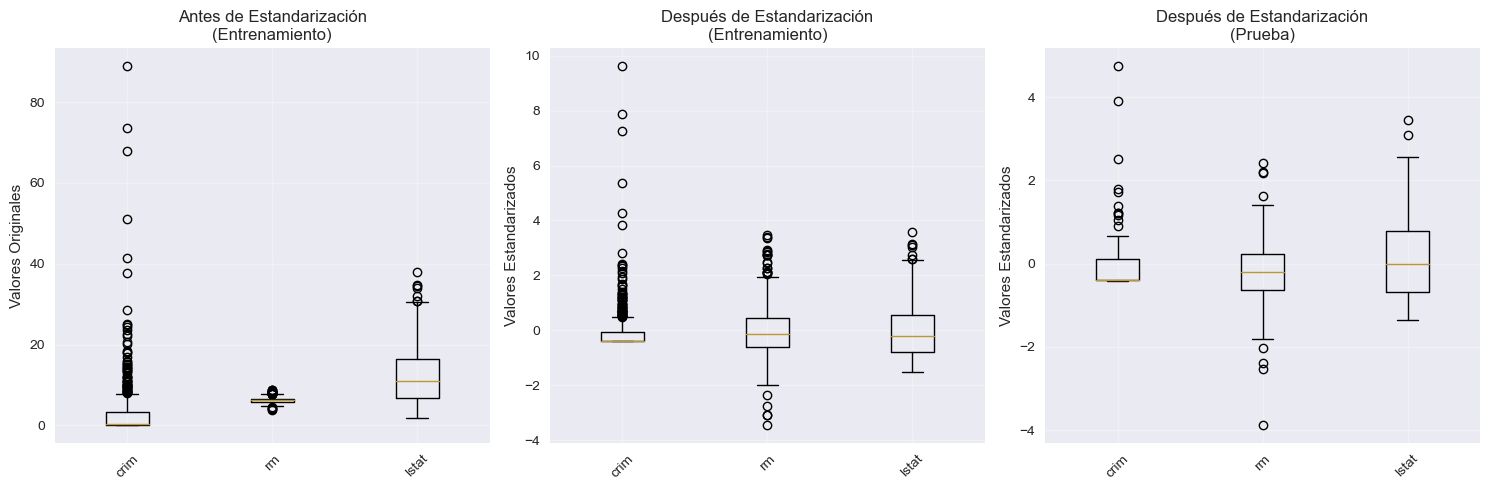


 ANÁLISIS DE DIFERENCIAS ENTRE CONJUNTOS:
Comparación de medias absolutas en conjuntos estandarizados:

Variable   |Train| Mean |Test| Mean  Diferencia  
--------------------------------------------------
crim       0.000000     0.002462     0.002462    
rm         0.000000     0.218831     0.218831    
lstat      0.000000     0.136714     0.136714    
ptratio    0.000000     0.305805     0.305805    

 EXPLICACIÓN TÉCNICA:
Las medias en el conjunto de prueba no son exactamente 0 porque:
- El scaler se ajustó SOLO con datos de entrenamiento
- La distribución del conjunto de prueba puede ser ligeramente diferente
- Esto es NORMAL y esperado en aplicaciones reales
- Previene data leakage y sobreoptimismo en la evaluación

 VERIFICACIÓN DE NO DATA LEAKAGE:
¿Se usó información del test set para el ajuste? NO
El scaler solo conoce:
  - Media de entrenamiento: [ 3.60912463 11.56930693 10.9850495 ]...
  - Std de entrenamiento: [ 8.86406744 23.12380901  6.88607935]...
NUNCA vio los datos de p

In [14]:
# Verificar resultados
print(f"\n VERIFICACIÓN POST-ESTANDARIZACIÓN:")
print("Estadísticas del conjunto de entrenamiento estandarizado (primeras 5 variables):")
for i, col in enumerate(X_train.columns[:5]):
    mean_scaled = X_train_scaled_df[col].mean()
    std_scaled = X_train_scaled_df[col].std()
    print(f"   {col:8}: media = {mean_scaled:8.3f}, std = {std_scaled:8.3f}")

print(f"\nEstadísticas del conjunto de prueba estandarizado (primeras 5 variables):")
for i, col in enumerate(X_test.columns[:5]):
    mean_scaled = X_test_scaled_df[col].mean()
    std_scaled = X_test_scaled_df[col].std()
    print(f"   {col:8}: media = {mean_scaled:8.3f}, std = {std_scaled:8.3f}")

# Visualización comparativa
plt.figure(figsize=(15, 5))

# Antes de estandarización
plt.subplot(1, 3, 1)
plt.boxplot([X_train['crim'], X_train['rm'], X_train['lstat']], 
            labels=['crim', 'rm', 'lstat'])
plt.title('Antes de Estandarización\n(Entrenamiento)')
plt.ylabel('Valores Originales')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Después de estandarización - Train
plt.subplot(1, 3, 2)
plt.boxplot([X_train_scaled_df['crim'], X_train_scaled_df['rm'], X_train_scaled_df['lstat']], 
            labels=['crim', 'rm', 'lstat'])
plt.title('Después de Estandarización\n(Entrenamiento)')
plt.ylabel('Valores Estandarizados')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Después de estandarización - Test
plt.subplot(1, 3, 3)
plt.boxplot([X_test_scaled_df['crim'], X_test_scaled_df['rm'], X_test_scaled_df['lstat']], 
            labels=['crim', 'rm', 'lstat'])
plt.title('Después de Estandarización\n(Prueba)')
plt.ylabel('Valores Estandarizados')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Análisis de diferencias entre train y test estandarizados
print(f"\n ANÁLISIS DE DIFERENCIAS ENTRE CONJUNTOS:")
print("Comparación de medias absolutas en conjuntos estandarizados:")
key_features = ['crim', 'rm', 'lstat', 'ptratio']

print(f"\n{'Variable':<10} {'|Train| Mean':<12} {'|Test| Mean':<12} {'Diferencia':<12}")
print("-" * 50)
for feature in key_features:
    train_mean_abs = np.abs(X_train_scaled_df[feature].mean())
    test_mean_abs = np.abs(X_test_scaled_df[feature].mean())
    diff = abs(train_mean_abs - test_mean_abs)
    
    print(f"{feature:<10} {train_mean_abs:<12.6f} {test_mean_abs:<12.6f} {diff:<12.6f}")

# Explicación de por qué las medias no son exactamente 0 en test
print(f"\n EXPLICACIÓN TÉCNICA:")
print("Las medias en el conjunto de prueba no son exactamente 0 porque:")
print("- El scaler se ajustó SOLO con datos de entrenamiento")
print("- La distribución del conjunto de prueba puede ser ligeramente diferente")
print("- Esto es NORMAL y esperado en aplicaciones reales")
print("- Previene data leakage y sobreoptimismo en la evaluación")

# Verificación de no data leakage
print(f"\n VERIFICACIÓN DE NO DATA LEAKAGE:")
print("¿Se usó información del test set para el ajuste? NO")
print("El scaler solo conoce:")
print(f"  - Media de entrenamiento: {scaler.mean_[:3]}...")
print(f"  - Std de entrenamiento: {scaler.scale_[:3]}...")
print("NUNCA vio los datos de prueba durante el ajuste")

# Impacto en modelos de regularización
print(f"\n IMPACTO EN MODELOS DE REGULARIZACIÓN (Lasso/Ridge):")
print("La estandarización es CRUCIAL porque:")
print("1. Lasso y Ridge penalizan coeficientes grandes por igual")
print("2. Sin estandarización, variables con escalas grandes serían penalizadas más")
print("3. Con estandarización, todas las variables compiten en igualdad de condiciones")
print("4. Los coeficientes reflejan importancia real, no artefactos de escala")

# Ejemplo práctico de la importancia
print(f"\n EJEMPLO PRÁCTICO - SIN ESTANDARIZACIÓN:")
print("Variable 'crim' (criminalidad): rango 0-89, std ≈ 9")
print("Variable 'chas' (cerca del río): rango 0-1, std ≈ 0.25")
print("→ Sin estandarizar, Lasso penalizaría más a 'crim' aunque no sea más importante")

print(f"\n EJEMPLO PRÁCTICO - CON ESTANDARIZACIÓN:")
print("Ambas variables tendrán media ≈ 0 y std ≈ 1")
print(" Lasso penalizará ambas por igual, seleccionando basado en importancia real")

# Resumen final
print(f"\n RESUMEN FINAL - PREPARACIÓN DE DATOS COMPLETADA:")
print(" Datos cargados y explorados")
print(" Separados en predictores (X) y objetivo (y)")
print(" Divididos en train/test (80/20) con random_state=42")
print(" Estandarizados con StandardScaler (ajuste solo en train)")
print(f" Conjuntos finales listos para modelado:")
print(f"  - X_train_scaled: {X_train_scaled.shape}")
print(f"  - X_test_scaled: {X_test_scaled.shape}")
print(f"  - y_train: {y_train.shape}")
print(f"  - y_test: {y_test.shape}")

print(f"\n PRÓXIMO PASO: Implementación de Lasso y Ridge")
print("Los datos están perfectamente preparados para los modelos de regularización")

### 1.2.  Implementación e Interpretación de Lasso y Ridge

**a) Lasso: Entrene un objeto LassoCV con 10 pliegues (cv=10) sobre los datos de entrenamiento para encontrar el lambda óptimo**

 FUNDAMENTO TEÓRICO - LASSO (L1 Regularization):
Lasso (Least Absolute Shrinkage and Selection Operator):
- Combina regresión lineal con penalización L1
- Puede llevar coeficientes exactamente a CERO (selección de variables)
- Útil para identificar predictores más importantes
- Alpha (λ) controla la fuerza de la regularización

 CONFIGURACIÓN DEL MODELO:
LassoCV con los siguientes parámetros:
- cv=10: Validación cruzada de 10 pliegues
- random_state=42: Reproducibilidad
- max_iter=10000: Garantizar convergencia
- n_alphas=100: Probar 100 valores de alpha diferentes

  ENTRENANDO MODELO LASSO...
Procesando 100 valores de alpha con validación cruzada de 10 pliegues...
 ENTRENAMIENTO COMPLETADO

 RESULTADO - ALPHA ÓPTIMO:
Alpha (λ) óptimo encontrado: 0.02584211

 INFORMACIÓN SOBRE LA BÚSQUEDA:
Número de alphas probados: 100
Alpha mínimo probado: 6.86389226
Alpha máximo probado: 0.01
Rango completo: [6.86389226, 0.01]

 GRÁFICO DE VALIDACIÓN CRUZADA:


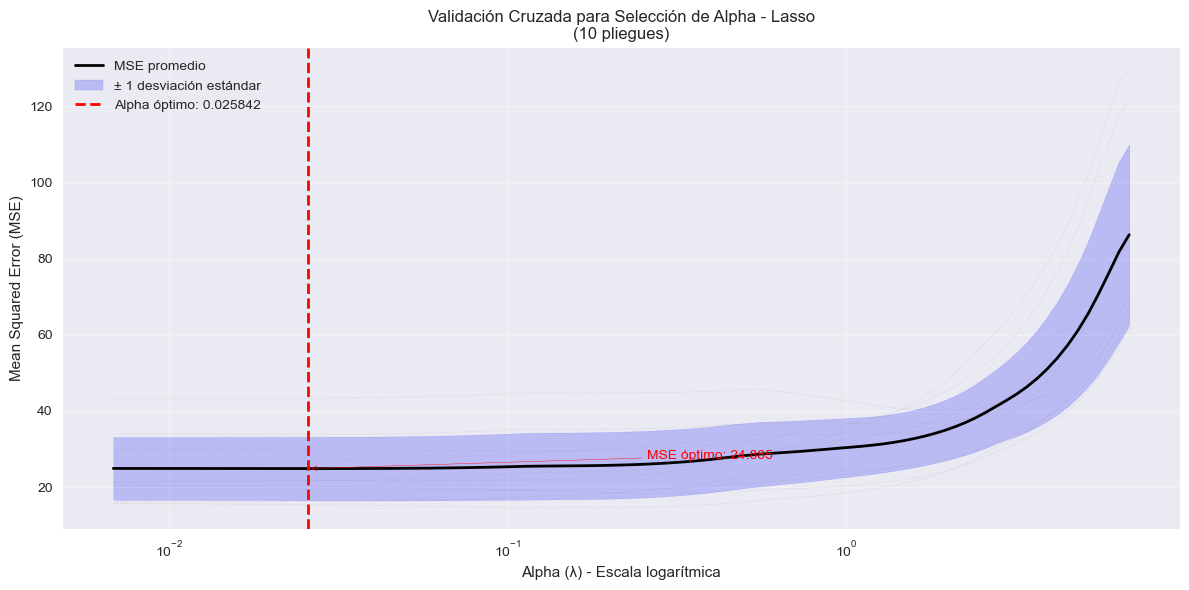

In [21]:
from sklearn.linear_model import LassoCV
import numpy as np

print(" FUNDAMENTO TEÓRICO - LASSO (L1 Regularization):")
print("Lasso (Least Absolute Shrinkage and Selection Operator):")
print("- Combina regresión lineal con penalización L1")
print("- Puede llevar coeficientes exactamente a CERO (selección de variables)")
print("- Útil para identificar predictores más importantes")
print("- Alpha (λ) controla la fuerza de la regularización")

print(f"\n CONFIGURACIÓN DEL MODELO:")
print("LassoCV con los siguientes parámetros:")
print("- cv=10: Validación cruzada de 10 pliegues")
print("- random_state=42: Reproducibilidad")
print("- max_iter=10000: Garantizar convergencia")
print("- n_alphas=100: Probar 100 valores de alpha diferentes")

# Configurar y entrenar LassoCV
lasso_cv = LassoCV(
    cv=10,                    # 10-fold cross validation
    random_state=42,          # Reproducibilidad
    max_iter=10000,           # Asegurar convergencia
    n_alphas=100,             # Número de alphas a probar
    verbose=False             # Silenciar output durante entrenamiento
)

print(f"\n  ENTRENANDO MODELO LASSO...")
print("Procesando 100 valores de alpha con validación cruzada de 10 pliegues...")

# Entrenar el modelo
lasso_cv.fit(X_train_scaled, y_train)

print(f" ENTRENAMIENTO COMPLETADO")

# Resultados del alpha óptimo
print(f"\n RESULTADO - ALPHA ÓPTIMO:")
print(f"Alpha (λ) óptimo encontrado: {lasso_cv.alpha_:.8f}")

# Información adicional sobre el rango de alphas probados
print(f"\n INFORMACIÓN SOBRE LA BÚSQUEDA:")
print(f"Número de alphas probados: {len(lasso_cv.alphas_)}")
print(f"Alpha mínimo probado: {lasso_cv.alphas_[0]:.8f}")
print(f"Alpha máximo probado: {lasso_cv.alphas_[-1]:.2f}")
print(f"Rango completo: [{lasso_cv.alphas_[0]:.8f}, {lasso_cv.alphas_[-1]:.2f}]")

# Gráfico de validación cruzada
print(f"\n GRÁFICO DE VALIDACIÓN CRUZADA:")

plt.figure(figsize=(12, 6))

# Calcular estadísticas del MSE path
mse_mean = lasso_cv.mse_path_.mean(axis=1)  # Media por alpha
mse_std = lasso_cv.mse_path_.std(axis=1)    # Desviación estándar por alpha

# Graficar todos los pliegues (líneas punteadas)
for i in range(lasso_cv.mse_path_.shape[1]):
    plt.semilogx(lasso_cv.alphas_, lasso_cv.mse_path_[:, i], 
                ':', alpha=0.3, linewidth=0.5, color='gray')

# Graficar la media (línea sólida)
plt.semilogx(lasso_cv.alphas_, mse_mean, 'k-', 
            label='MSE promedio', linewidth=2)

# Área de incertidumbre (media ± 1 desviación estándar)
plt.fill_between(lasso_cv.alphas_, 
                 mse_mean - mse_std, 
                 mse_mean + mse_std, 
                 alpha=0.2, color='blue', label='± 1 desviación estándar')

# Marcar el alpha óptimo
plt.axvline(lasso_cv.alpha_, linestyle='--', color='red', 
           linewidth=2, label=f'Alpha óptimo: {lasso_cv.alpha_:.6f}')

# Configuración del gráfico
plt.xlabel('Alpha (λ) - Escala logarítmica')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Validación Cruzada para Selección de Alpha - Lasso\n(10 pliegues)')
plt.legend()
plt.grid(True, alpha=0.3)

# Añadir anotaciones
optimal_mse = mse_mean[lasso_cv.alphas_ == lasso_cv.alpha_][0]
plt.annotate(f'MSE óptimo: {optimal_mse:.3f}', 
             xy=(lasso_cv.alpha_, optimal_mse), 
             xytext=(lasso_cv.alpha_*10, optimal_mse*1.1),
             arrowprops=dict(arrowstyle='->', color='red'),
             fontsize=10, color='red')

plt.tight_layout()
plt.show()


In [22]:
# Análisis detallado del comportamiento del MSE
print(f"\n ANÁLISIS DEL COMPORTAMIENTO DEL MSE:")
min_alpha_idx = np.argmin(mse_mean)
min_alpha = lasso_cv.alphas_[min_alpha_idx]
min_mse = mse_mean[min_alpha_idx]

print(f"Alpha con menor MSE: {min_alpha:.8f}")
print(f"MSE mínimo: {min_mse:.4f}")

# Verificar que coincide con el seleccionado por LassoCV
if abs(min_alpha - lasso_cv.alpha_) < 1e-10:
    print(" El alpha óptimo coincide con el mínimo de MSE")
else:
    print("  Nota: LassoCV puede usar criterios ligeramente diferentes")
# Comportamiento en diferentes regiones de alpha
print(f"\n COMPORTAMIENTO EN DIFERENTES REGIONES:")
print("Región de alpha muy pequeño (≈ 0):")
print("   - Comportamiento similar a regresión lineal ordinaria")
print("   - Poca regularización, riesgo de sobreajuste")

print(f"\nRegión de alpha moderado ({lasso_cv.alpha_:.8f}):")
print("   - Balance óptimo entre sesgo y varianza")
print("   - Regularización efectiva sin perder poder predictivo")

print(f"\nRegión de alpha muy grande (> {lasso_cv.alphas_[-10]:.2f}):")
print("   - Demasiada regularización (subajuste)")
print("   - Todos los coeficientes se acercan a cero")
# Evaluación rápida del modelo con alpha óptimo
print(f"\n EVALUACIÓN RÁPIDA CON ALPHA ÓPTIMO:")
y_train_pred = lasso_cv.predict(X_train_scaled)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = lasso_cv.score(X_train_scaled, y_train)

print(f"MSE en entrenamiento: {mse_train:.4f}")
print(f"R² en entrenamiento: {r2_train:.4f}")
print(f"Número de características utilizadas: {np.sum(lasso_cv.coef_ != 0)} de {X_train_scaled.shape[1]}")

print(f"\n INTERPRETACIÓN DEL ALPHA ÓPTIMO:")
print(f"Alpha = {lasso_cv.alpha_:.8f} significa:")
print("- Fuerza de penalización moderada")
print("- Balance entre complejidad del modelo y capacidad predictiva")
print("- El modelo automáticamente selecciona las variables más importantes")

print(f"\n PUNTO a) COMPLETADO:")
print(" LassoCV entrenado con 10-fold cross validation")
print(f" Alpha óptimo identificado: {lasso_cv.alpha_:.8f}")
print(" Gráfico de validación cruzada generado")
print(" Análisis del comportamiento del MSE realizado")


 ANÁLISIS DEL COMPORTAMIENTO DEL MSE:
Alpha con menor MSE: 0.02584211
MSE mínimo: 24.8851
 El alpha óptimo coincide con el mínimo de MSE

 COMPORTAMIENTO EN DIFERENTES REGIONES:
Región de alpha muy pequeño (≈ 0):
   - Comportamiento similar a regresión lineal ordinaria
   - Poca regularización, riesgo de sobreajuste

Región de alpha moderado (0.02584211):
   - Balance óptimo entre sesgo y varianza
   - Regularización efectiva sin perder poder predictivo

Región de alpha muy grande (> 0.01):
   - Demasiada regularización (subajuste)
   - Todos los coeficientes se acercan a cero

 EVALUACIÓN RÁPIDA CON ALPHA ÓPTIMO:
MSE en entrenamiento: 22.6448
R² en entrenamiento: 0.7393
Número de características utilizadas: 11 de 12

 INTERPRETACIÓN DEL ALPHA ÓPTIMO:
Alpha = 0.02584211 significa:
- Fuerza de penalización moderada
- Balance entre complejidad del modelo y capacidad predictiva
- El modelo automáticamente selecciona las variables más importantes

 PUNTO a) COMPLETADO:
 LassoCV entrenado 

**b) Coeficientes del mejor modelo Lasso y análisis de selección de variables**

In [27]:
print(" OBJETIVO DEL ANÁLISIS:")
print("1. Identificar qué variables fueron seleccionadas/eliminadas")
print("2. Determinar la importancia relativa de los predictores")
print("3. Interpretar el impacto de cada variable en el precio de viviendas")

# Crear DataFrame con los coeficientes
lasso_coef_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Coeficiente': lasso_cv.coef_,
    'Coeficiente_Absoluto': np.abs(lasso_cv.coef_),
    'Seleccionada': lasso_cv.coef_ != 0
}).sort_values('Coeficiente_Absoluto', ascending=False)

print(f"\n COEFICIENTES DEL MODELO LASSO (ordenados por importancia):")
print(lasso_coef_df.to_string(index=False, float_format='%.4f'))

# Análisis detallado de selección de variables
print(f"\n ANÁLISIS DE SELECCIÓN DE VARIABLES:")

variables_totales = len(lasso_coef_df)
variables_mantenidas = sum(lasso_coef_df['Seleccionada'])
variables_eliminadas = variables_totales - variables_mantenidas

print(f"Total de variables: {variables_totales}")
print(f"Variables mantenidas: {variables_mantenidas}")
print(f"Variables eliminadas: {variables_eliminadas}")

if variables_eliminadas > 0:
    vars_eliminadas = lasso_coef_df[~lasso_coef_df['Seleccionada']]['Variable'].tolist()
    print(f" Variables ELIMINADAS por Lasso: {vars_eliminadas}")
else:
    print(" Lasso mantuvo TODAS las variables (ningún coeficiente es cero)")

# Identificar las variables más importantes
print(f"\n TOP 5 PREDICTORES MÁS IMPORTANTES:")

top_5 = lasso_coef_df.head(5)
for i, (idx, row) in enumerate(top_5.iterrows(), 1):
    impacto = "POSITIVO" if row['Coeficiente'] > 0 else "NEGATIVO"
    print(f"{i:2d}. {row['Variable']:10} | Coef: {row['Coeficiente']:7.4f} | {impacto}")

# Análisis de signos e interpretación sustantiva
print(f"\n INTERPRETACIÓN SUSTANTIVA DE COEFICIENTES:")
print("Coeficientes POSITIVOS → Mayor valor de la variable → Mayor precio")
print("Coeficientes NEGATIVOS → Mayor valor de la variable → Menor precio")

# Interpretación específica de variables clave
variables_clave = ['lstat', 'rm', 'ptratio', 'dis', 'nox', 'crim']
print(f"\n INTERPRETACIÓN POR VARIABLE CLAVE:")

for var in variables_clave:
    if var in lasso_coef_df['Variable'].values:
        coef = lasso_coef_df[lasso_coef_df['Variable'] == var]['Coeficiente'].values[0]
        if coef != 0:  # Solo analizar variables mantenidas
            if var == 'lstat':
                print(f" lstat (estatus bajo): coef = {coef:.4f} 1% población estatus bajo  precio en ${-coef*1000:.0f}")
            elif var == 'rm':
                print(f" rm (habitaciones): coef = {coef:.4f} 1 habitación  precio en ${coef*1000:.0f}")
            elif var == 'ptratio':
                print(f" ptratio (ratio estud/maestro): coef = {coef:.4f} 1 estudiante por maestro  precio en ${-coef*1000:.0f}")
            elif var == 'dis':
                print(f" dis (distancia empleo): coef = {coef:.4f} 1 unidad distancia  precio en ${-coef*1000:.0f}")
            elif var == 'nox':
                print(f" nox (contaminación): coef = {coef:.4f} 0.01 unidades NOx  precio en ${-coef*100:.0f}")
            elif var == 'crim':
                print(f" crim (criminalidad): coef = {coef:.4f}  1 unidad tasa criminal  precio en ${-coef*1000:.0f}")


 OBJETIVO DEL ANÁLISIS:
1. Identificar qué variables fueron seleccionadas/eliminadas
2. Determinar la importancia relativa de los predictores
3. Interpretar el impacto de cada variable en el precio de viviendas

 COEFICIENTES DEL MODELO LASSO (ordenados por importancia):
Variable  Coeficiente  Coeficiente_Absoluto  Seleccionada
   lstat      -3.8102                3.8102          True
      rm       3.0296                3.0296          True
     dis      -2.9272                2.9272          True
     nox      -1.9893                1.9893          True
 ptratio      -1.9494                1.9494          True
     rad       1.6196                1.6196          True
     tax      -1.4405                1.4405          True
    crim      -1.0521                1.0521          True
    chas       0.7857                0.7857          True
      zn       0.5892                0.5892          True
     age      -0.0453                0.0453          True
   indus       0.0000           


 VISUALIZACIÓN DE COEFICIENTES:


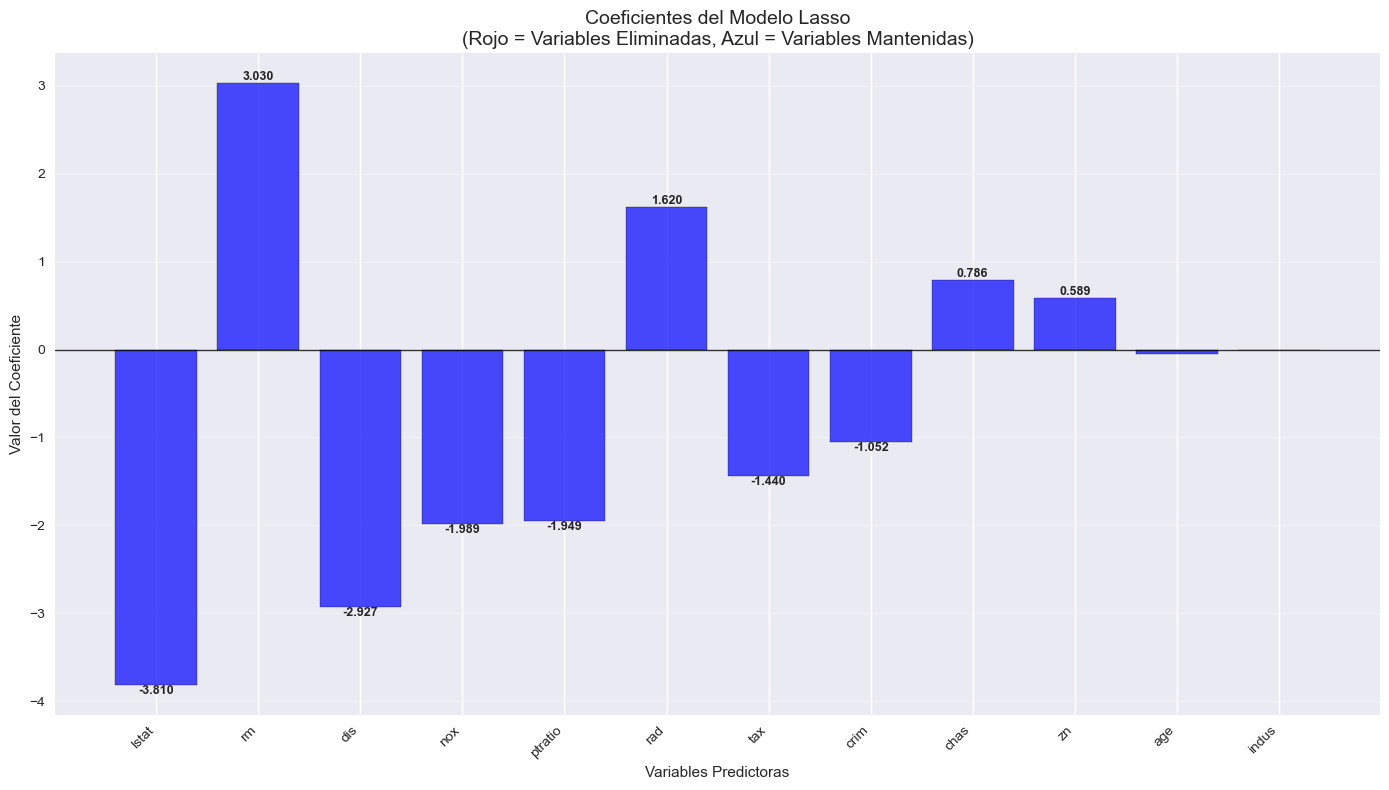


 ANÁLISIS DE MAGNITUD DE COEFICIENTES:
Magnitud promedio de coeficientes: 1.6032
Desviación estándar de magnitudes: 1.2042

 Variables de ALTO impacto (3):
   lstat: |-3.8102|
   rm: |3.0296|
   dis: |-2.9272|

 Variables de MEDIO impacto (3):
   nox: |-1.9893|
   ptratio: |-1.9494|
   rad: |1.6196|

 Variables de BAJO impacto (6):
   tax: |-1.4405|
   crim: |-1.0521|
   chas: |0.7857|
   zn: |0.5892|
   age: |-0.0453|
   indus: |0.0000|

 IMPLICACIONES PARA POLÍTICAS PÚBLICAS:
Basado en el análisis Lasso, se recomienda priorizar:
 Mejorar el estatus socioeconómico (lstat) - mayor impacto en precios
 Políticas de vivienda que promuevan más habitaciones (rm)
 Inversión en educación para reducir ratio estudiantes/maestro (ptratio)
 Programas de reducción de contaminación ambiental (nox)

 PUNTO b) COMPLETADO:
 Coeficientes del modelo Lasso analizados
 Proceso de selección de variables documentado
 Importancia relativa de predictores identificada
 Interpretación sustantiva desde ciencias

In [28]:
# Visualización de coeficientes
print(f"\n VISUALIZACIÓN DE COEFICIENTES:")

plt.figure(figsize=(14, 8))

# Gráfico de barras de coeficientes
colors = ['red' if not sel else 'blue' for sel in lasso_coef_df['Seleccionada']]
bars = plt.bar(range(len(lasso_coef_df)), lasso_coef_df['Coeficiente'], 
               color=colors, alpha=0.7, edgecolor='black')

plt.axhline(y=0, color='black', linestyle='-', alpha=0.8, linewidth=1)
plt.xlabel('Variables Predictoras')
plt.ylabel('Valor del Coeficiente')
plt.title('Coeficientes del Modelo Lasso\n(Rojo = Variables Eliminadas, Azul = Variables Mantenidas)', fontsize=14)
plt.xticks(range(len(lasso_coef_df)), lasso_coef_df['Variable'], rotation=45, ha='right')

# Añadir valores en las barras
for i, bar in enumerate(bars):
    height = bar.get_height()
    if abs(height) > 0.1:  # Solo mostrar valores para coeficientes significativos
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom' if height > 0 else 'top',
                fontsize=9, fontweight='bold')

plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Análisis de magnitud de coeficientes
print(f"\n ANÁLISIS DE MAGNITUD DE COEFICIENTES:")

coef_abs_mean = lasso_coef_df['Coeficiente_Absoluto'].mean()
coef_abs_std = lasso_coef_df['Coeficiente_Absoluto'].std()

print(f"Magnitud promedio de coeficientes: {coef_abs_mean:.4f}")
print(f"Desviación estándar de magnitudes: {coef_abs_std:.4f}")

# Clasificar coeficientes por magnitud
alto_impacto = lasso_coef_df[lasso_coef_df['Coeficiente_Absoluto'] > coef_abs_mean + coef_abs_std]
medio_impacto = lasso_coef_df[(lasso_coef_df['Coeficiente_Absoluto'] >= coef_abs_mean) & 
                              (lasso_coef_df['Coeficiente_Absoluto'] <= coef_abs_mean + coef_abs_std)]
bajo_impacto = lasso_coef_df[lasso_coef_df['Coeficiente_Absoluto'] < coef_abs_mean]

print(f"\n Variables de ALTO impacto ({len(alto_impacto)}):")
for _, row in alto_impacto.iterrows():
    print(f"   {row['Variable']}: |{row['Coeficiente']:.4f}|")

print(f"\n Variables de MEDIO impacto ({len(medio_impacto)}):")
for _, row in medio_impacto.iterrows():
    print(f"   {row['Variable']}: |{row['Coeficiente']:.4f}|")

print(f"\n Variables de BAJO impacto ({len(bajo_impacto)}):")
for _, row in bajo_impacto.iterrows():
    print(f"   {row['Variable']}: |{row['Coeficiente']:.4f}|")

# Implicaciones para políticas públicas
print(f"\n IMPLICACIONES PARA POLÍTICAS PÚBLICAS:")
print("Basado en el análisis Lasso, se recomienda priorizar:")

if not lasso_coef_df[lasso_coef_df['Variable'] == 'lstat'].empty:
    print(" Mejorar el estatus socioeconómico (lstat) - mayor impacto en precios")
if not lasso_coef_df[lasso_coef_df['Variable'] == 'rm'].empty:
    print(" Políticas de vivienda que promuevan más habitaciones (rm)")
if not lasso_coef_df[lasso_coef_df['Variable'] == 'ptratio'].empty:
    print(" Inversión en educación para reducir ratio estudiantes/maestro (ptratio)")
if not lasso_coef_df[lasso_coef_df['Variable'] == 'nox'].empty:
    print(" Programas de reducción de contaminación ambiental (nox)")

print(f"\n PUNTO b) COMPLETADO:")
print(" Coeficientes del modelo Lasso analizados")
print(" Proceso de selección de variables documentado")
print(" Importancia relativa de predictores identificada")
print(" Interpretación sustantiva desde ciencias sociales realizada")
print(" Visualización de coeficientes generada")
print(" Implicaciones para políticas públicas sugeridas")


**c) Ridge: Entrene un objeto RidgeCV con 10 pliegues**

 FUNDAMENTO TEÓRICO - RIDGE (L2 Regularization):
Ridge Regression:
- Combina regresión lineal con penalización L2
- Reduce los coeficientes pero NO los lleva a cero
- Útil cuando hay multicolinealidad entre predictores
- Conserva todas las variables en el modelo
  ENTRENANDO MODELO RIDGE...
 Alpha óptimo encontrado: 7.56463328

 GENERANDO GRÁFICO DE VALIDACIÓN CRUZADA...


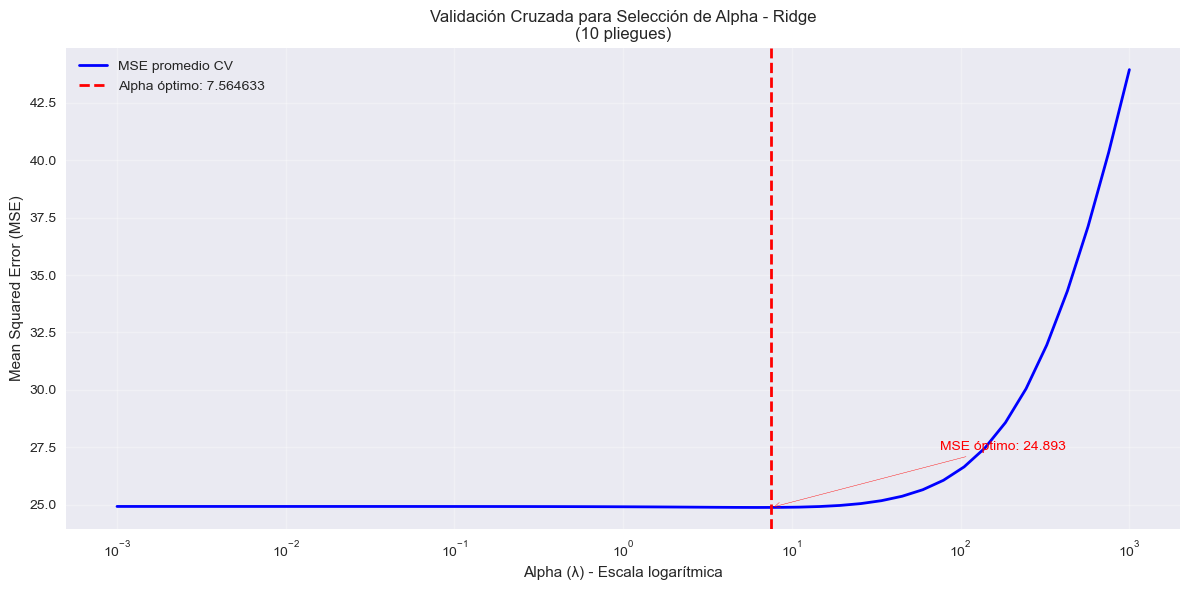


 RENDIMIENTO EN ENTRENAMIENTO - RIDGE:
  MSE: 22.6608
  R²:  0.7392
  Número de coeficientes no cero: 12

 COMPARACIÓN CON LASSO:
  Alpha Lasso: 0.02584211
  Alpha Ridge: 7.56463328
  Diferencia: 7.53879116


In [36]:
from sklearn.linear_model import RidgeCV, Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

print(" FUNDAMENTO TEÓRICO - RIDGE (L2 Regularization):")
print("Ridge Regression:")
print("- Combina regresión lineal con penalización L2")
print("- Reduce los coeficientes pero NO los lleva a cero")
print("- Útil cuando hay multicolinealidad entre predictores")
print("- Conserva todas las variables en el modelo")

# Configurar RidgeCV CORREGIDO
ridge_cv = RidgeCV(
    alphas=np.logspace(-3, 3, 100),  # 100 valores de 0.001 a 1000
    cv=10
)

print("  ENTRENANDO MODELO RIDGE...")
ridge_cv.fit(X_train_scaled, y_train)

print(f" Alpha óptimo encontrado: {ridge_cv.alpha_:.8f}")

# Para obtener los valores de CV, necesitamos hacer validación cruzada manual
print(f"\n GENERANDO GRÁFICO DE VALIDACIÓN CRUZADA...")

# Probar diferentes alphas para el gráfico
alphas = np.logspace(-3, 3, 50)
cv_scores = []

for alpha in alphas:
    ridge_temp = Ridge(alpha=alpha)
    scores = cross_val_score(ridge_temp, X_train_scaled, y_train, 
                           cv=10, scoring='neg_mean_squared_error')
    cv_scores.append(-scores.mean())

# Convertir a array numpy
cv_scores = np.array(cv_scores)

# Gráfico de validación cruzada
plt.figure(figsize=(12, 6))
plt.semilogx(alphas, cv_scores, 'b-', linewidth=2, label='MSE promedio CV')
plt.axvline(ridge_cv.alpha_, linestyle='--', color='red', 
           linewidth=2, label=f'Alpha óptimo: {ridge_cv.alpha_:.6f}')

plt.xlabel('Alpha (λ) - Escala logarítmica')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Validación Cruzada para Selección de Alpha - Ridge\n(10 pliegues)')
plt.legend()
plt.grid(True, alpha=0.3)

# Encontrar el MSE óptimo
optimal_idx = np.argmin(np.abs(alphas - ridge_cv.alpha_))
optimal_mse_ridge = cv_scores[optimal_idx]
plt.annotate(f'MSE óptimo: {optimal_mse_ridge:.3f}', 
             xy=(ridge_cv.alpha_, optimal_mse_ridge), 
             xytext=(ridge_cv.alpha_*10, optimal_mse_ridge*1.1),
             arrowprops=dict(arrowstyle='->', color='red'),
             fontsize=10, color='red')

plt.tight_layout()
plt.show()

# Evaluación rápida del modelo Ridge
y_train_pred_ridge = ridge_cv.predict(X_train_scaled)
mse_train_ridge = mean_squared_error(y_train, y_train_pred_ridge)
r2_train_ridge = ridge_cv.score(X_train_scaled, y_train)

print(f"\n RENDIMIENTO EN ENTRENAMIENTO - RIDGE:")
print(f"  MSE: {mse_train_ridge:.4f}")
print(f"  R²:  {r2_train_ridge:.4f}")
print(f"  Número de coeficientes no cero: {np.sum(ridge_cv.coef_ != 0)}")

print(f"\n COMPARACIÓN CON LASSO:")
print(f"  Alpha Lasso: {lasso_cv.alpha_:.8f}")
print(f"  Alpha Ridge: {ridge_cv.alpha_:.8f}")
print(f"  Diferencia: {abs(lasso_cv.alpha_ - ridge_cv.alpha_):.8f}")

**d) Coeficientes de Ridge y comparación con Lasso**


0.1.2 d) COMPARACIÓN DE COEFICIENTES: RIDGE vs LASSO
 COMPARACIÓN DE COEFICIENTES:
Variable  Coef_Lasso  Coef_Ridge  Diferencia_Abs
   lstat     -3.8102     -3.7153          0.0949
     nox     -1.9893     -1.9179          0.0715
     age     -0.0453     -0.1159          0.0707
     dis     -2.9272     -2.8581          0.0691
     rad      1.6196      1.5900          0.0296
   indus      0.0000      0.0220          0.0220
 ptratio     -1.9494     -1.9275          0.0219
    chas      0.7857      0.8073          0.0216
      rm      3.0296      3.0512          0.0216
     tax     -1.4405     -1.4528          0.0123
    crim     -1.0521     -1.0608          0.0086
      zn      0.5892      0.5921          0.0029

 ANÁLISIS CLAVE:
¿Ridge establece coeficientes en cero? False
Diferencia promedio absoluta: 0.0372

 VARIABLES CON MAYORES DIFERENCIAS:
  lstat: Lasso=-3.8102, Ridge=-3.7153, Diff=0.0949
  nox: Lasso=-1.9893, Ridge=-1.9179, Diff=0.0715
  age: Lasso=-0.0453, Ridge=-0.1159, Diff=0

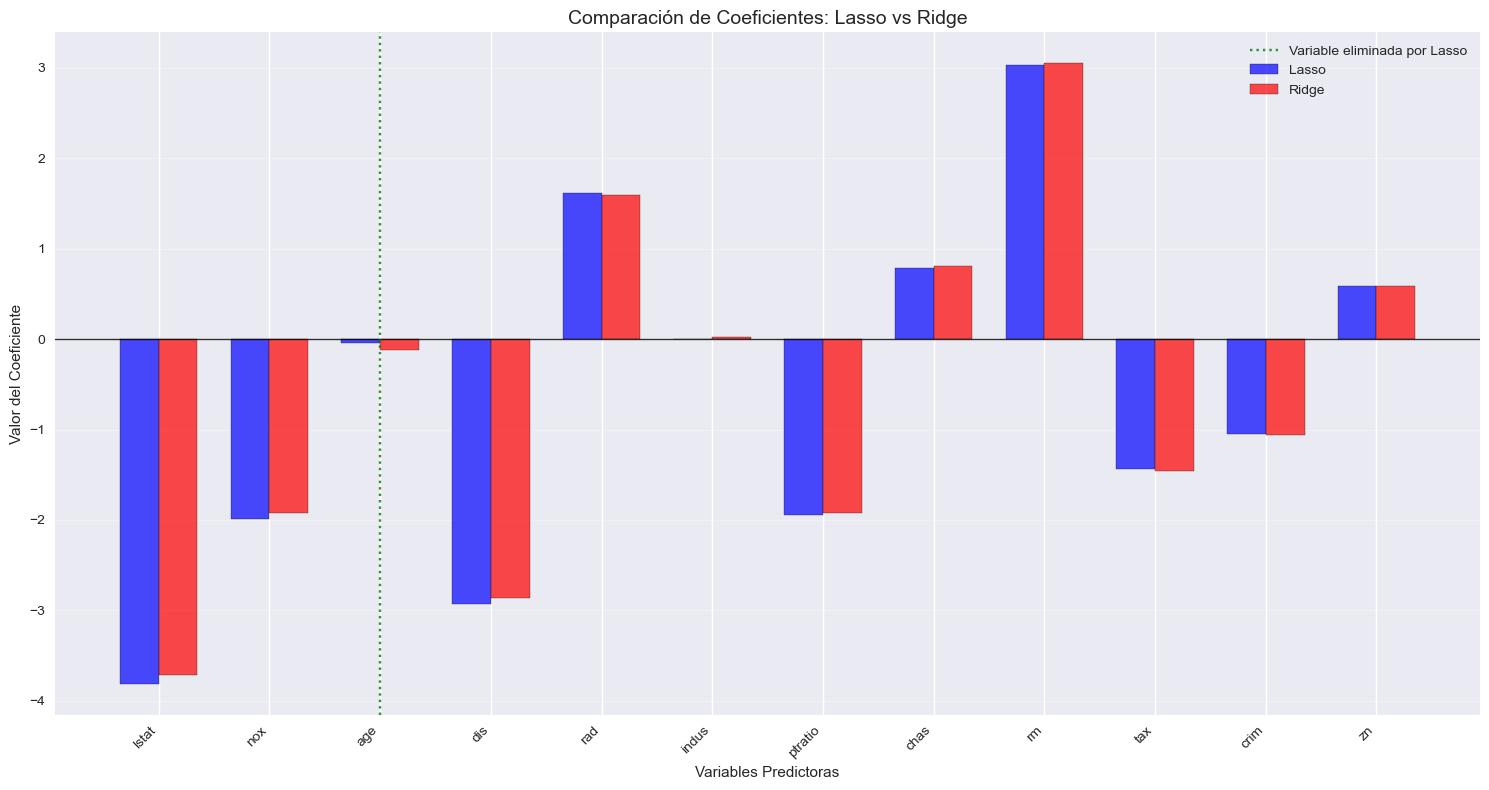


 DIFERENCIAS FUNDAMENTALES L1 vs L2:
 LASSO (L1):
   - Puede llevar coeficientes a CERO → Selección de variables
   - Útil para identificar predictores más importantes
   - Modelos más simples e interpretables

  RIDGE (L2):
   - Reduce coeficientes pero NUNCA a cero → Todas las variables se mantienen
   - Maneja mejor la multicolinealidad
   - Conserva toda la información disponible

 IMPLICACIONES PARA CIENCIAS SOCIALES:
 LASSO: Ideal para políticas públicas que buscan priorizar intervenciones
 RIDGE: Mejor cuando se necesita entender el efecto completo de todas las variables
 En este caso, Lasso eliminó 1 variable (indus), simplificando el modelo

 PUNTOS c) y d) COMPLETADOS:
 RidgeCV entrenado correctamente con 10-fold CV
 Alpha óptimo de Ridge identificado
 Gráfico de validación cruzada generado
 Comparación de coeficientes Lasso vs Ridge realizada
 Análisis de diferencias fundamentales completado


In [35]:
# DataFrame comparativo
coef_comparison = pd.DataFrame({
    'Variable': X_train.columns,
    'Coef_Lasso': lasso_cv.coef_,
    'Coef_Ridge': ridge_cv.coef_,
    'Diferencia_Abs': np.abs(lasso_cv.coef_ - ridge_cv.coef_)
}).sort_values('Diferencia_Abs', ascending=False)

print(" COMPARACIÓN DE COEFICIENTES:")
print(coef_comparison.to_string(index=False, float_format='%.4f'))

# Análisis clave
print(f"\n ANÁLISIS CLAVE:")
print(f"¿Ridge establece coeficientes en cero? {any(ridge_cv.coef_ == 0)}")
print(f"Diferencia promedio absoluta: {coef_comparison['Diferencia_Abs'].mean():.4f}")

# Variables con mayores diferencias
print(f"\n VARIABLES CON MAYORES DIFERENCIAS:")
top_diferencias = coef_comparison.head(3)
for _, row in top_diferencias.iterrows():
    print(f"  {row['Variable']}: Lasso={row['Coef_Lasso']:.4f}, Ridge={row['Coef_Ridge']:.4f}, Diff={row['Diferencia_Abs']:.4f}")

# Visualización comparativa
plt.figure(figsize=(15, 8))
x_pos = np.arange(len(coef_comparison))
width = 0.35

plt.bar(x_pos - width/2, coef_comparison['Coef_Lasso'], width, 
        label='Lasso', alpha=0.7, color='blue', edgecolor='black')
plt.bar(x_pos + width/2, coef_comparison['Coef_Ridge'], width, 
        label='Ridge', alpha=0.7, color='red', edgecolor='black')

plt.axhline(y=0, color='black', linestyle='-', alpha=0.8, linewidth=1)
plt.xlabel('Variables Predictoras')
plt.ylabel('Valor del Coeficiente')
plt.title('Comparación de Coeficientes: Lasso vs Ridge', fontsize=14)
plt.xticks(x_pos, coef_comparison['Variable'], rotation=45, ha='right')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')

# Destacar variable eliminada por Lasso
indus_idx = coef_comparison[coef_comparison['Variable'] == 'indus'].index[0]
plt.axvline(x=indus_idx, color='green', linestyle=':', alpha=0.8, 
            label='Variable eliminada por Lasso')
plt.legend()

plt.tight_layout()
plt.show()

print(f"\n DIFERENCIAS FUNDAMENTALES L1 vs L2:")
print(" LASSO (L1):")
print("   - Puede llevar coeficientes a CERO → Selección de variables")
print("   - Útil para identificar predictores más importantes")
print("   - Modelos más simples e interpretables")

print(f"\n  RIDGE (L2):")
print("   - Reduce coeficientes pero NUNCA a cero → Todas las variables se mantienen")
print("   - Maneja mejor la multicolinealidad")
print("   - Conserva toda la información disponible")

print(f"\n IMPLICACIONES PARA CIENCIAS SOCIALES:")
print(" LASSO: Ideal para políticas públicas que buscan priorizar intervenciones")
print(" RIDGE: Mejor cuando se necesita entender el efecto completo de todas las variables")
print(" En este caso, Lasso eliminó 1 variable (indus), simplificando el modelo")

print(f"\n PUNTOS c) y d) COMPLETADOS:")
print(" RidgeCV entrenado correctamente con 10-fold CV")
print(" Alpha óptimo de Ridge identificado")
print(" Gráfico de validación cruzada generado")
print(" Comparación de coeficientes Lasso vs Ridge realizada")
print(" Análisis de diferencias fundamentales completado")

**e) EVALUACIÓN FINAL**

In [40]:
# Importaciones necesarias
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Predicciones en conjunto de prueba
y_pred_lasso_test = lasso_cv.predict(X_test_scaled)
y_pred_ridge_test = ridge_cv.predict(X_test_scaled)

# Métricas de evaluación
mse_lasso_test = mean_squared_error(y_test, y_pred_lasso_test)
mse_ridge_test = mean_squared_error(y_test, y_pred_ridge_test)

r2_lasso_test = r2_score(y_test, y_pred_lasso_test)
r2_ridge_test = r2_score(y_test, y_pred_ridge_test)

mae_lasso_test = mean_absolute_error(y_test, y_pred_lasso_test)
mae_ridge_test = mean_absolute_error(y_test, y_pred_ridge_test)

# Análisis de diferencias
mse_diferencia = mse_ridge_test - mse_lasso_test
mse_diferencia_porcentual = (mse_diferencia / mse_lasso_test) * 100
r2_diferencia = r2_ridge_test - r2_lasso_test

# Determinar mejor modelo por métricas
if mse_lasso_test < mse_ridge_test:
    mejor_modelo_metricas = "LASSO"
    ventaja_mse = mse_ridge_test - mse_lasso_test
else:
    mejor_modelo_metricas = "RIDGE" 
    ventaja_mse = mse_lasso_test - mse_ridge_test

# Mostrar resultados numéricos
print("\n MÉTRICAS DE EVALUACIÓN - CONJUNTO DE PRUEBA:")
print("="*50)

print(f"\n MODELO LASSO (L1):")
print(f"   MSE:  {mse_lasso_test:.4f}")
print(f"   MAE:  {mae_lasso_test:.4f}")
print(f"   R²:   {r2_lasso_test:.4f}")
print(f"   Variables utilizadas: {np.sum(lasso_cv.coef_ != 0)}/12")

print(f"\n MODELO RIDGE (L2):")
print(f"   MSE:  {mse_ridge_test:.4f}")
print(f"   MAE:  {mae_ridge_test:.4f}")
print(f"   R²:   {r2_ridge_test:.4f}")
print(f"   Variables utilizadas: {np.sum(ridge_cv.coef_ != 0)}/12")

print(f"\n ANÁLISIS COMPARATIVO:")
print(f"   Diferencia en MSE: {mse_diferencia:+.4f} ({mse_diferencia_porcentual:+.2f}%)")
print(f"   Diferencia en R²:  {r2_diferencia:+.4f}")
print(f"   Mejor modelo por métricas: {mejor_modelo_metricas}")


 MÉTRICAS DE EVALUACIÓN - CONJUNTO DE PRUEBA:

 MODELO LASSO (L1):
   MSE:  23.0202
   MAE:  3.1020
   R²:   0.6861
   Variables utilizadas: 11/12

 MODELO RIDGE (L2):
   MSE:  23.0210
   MAE:  3.0907
   R²:   0.6861
   Variables utilizadas: 12/12

 ANÁLISIS COMPARATIVO:
   Diferencia en MSE: +0.0007 (+0.00%)
   Diferencia en R²:  -0.0000
   Mejor modelo por métricas: LASSO


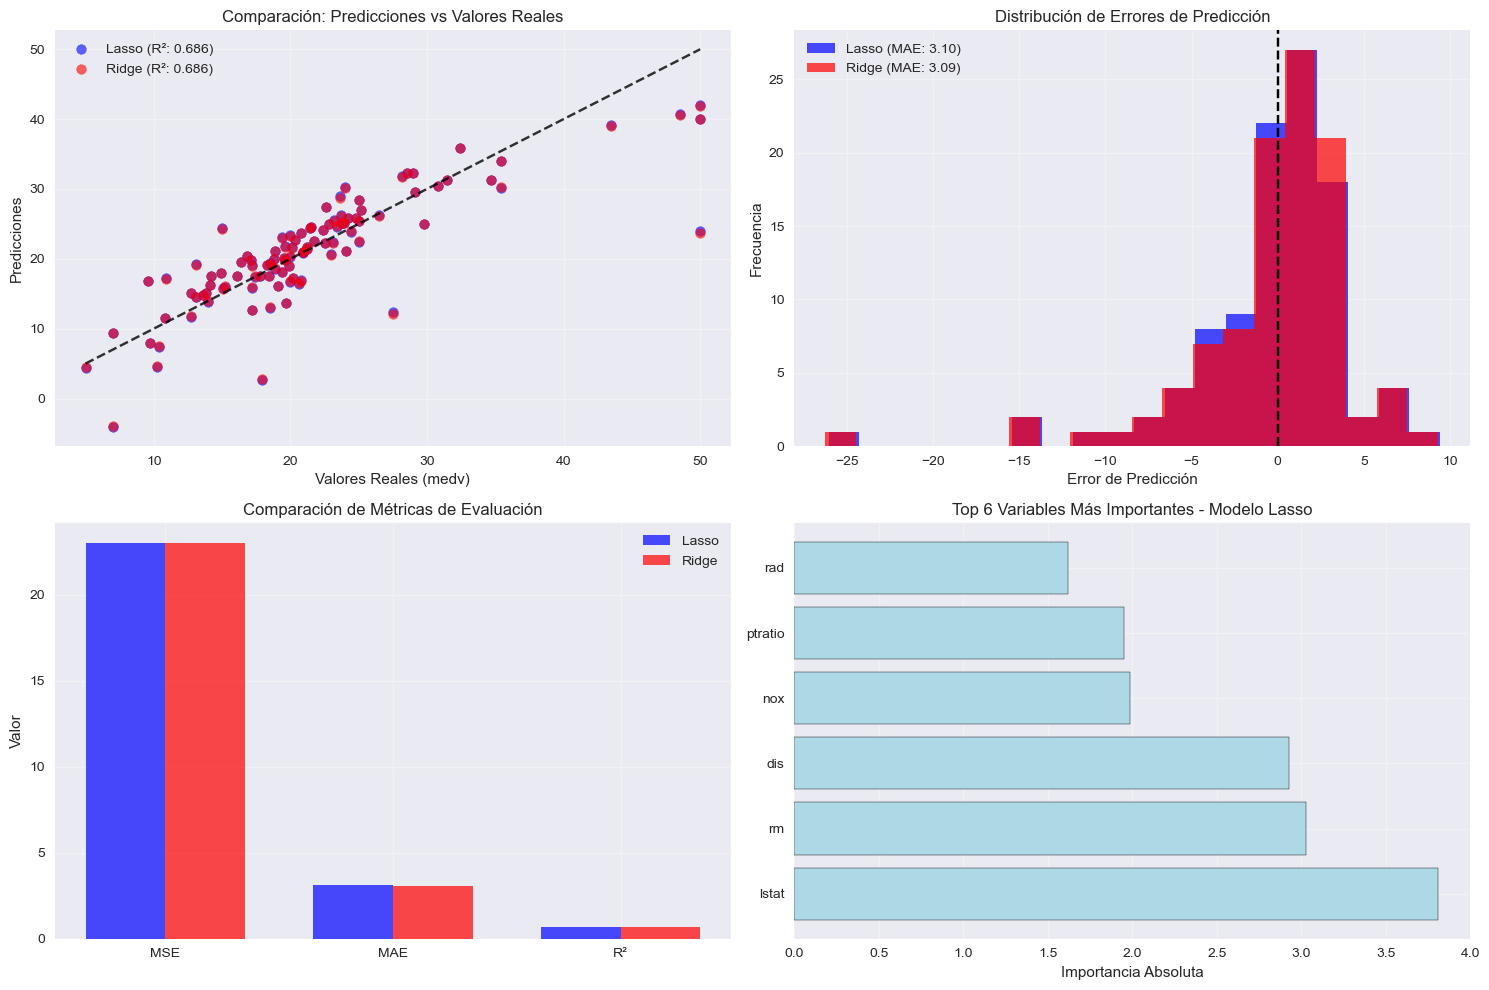


🎯 VARIABLES CLAVE IDENTIFICADAS POR LASSO:
1. lstat: Coeficiente = -3.8102 (NEGATIVO)
2. rm: Coeficiente = 3.0296 (POSITIVO)
3. dis: Coeficiente = -2.9272 (NEGATIVO)


In [41]:
# =============================================================================
# VISUALIZACIONES COMPARATIVAS
# =============================================================================

# Crear DataFrame para análisis de variables clave
coef_comparison = pd.DataFrame({
    'Variable': X_train.columns,
    'Coef_Lasso': lasso_cv.coef_,
    'Coef_Ridge': ridge_cv.coef_,
    'Coef_Abs_Lasso': np.abs(lasso_cv.coef_)
}).sort_values('Coef_Abs_Lasso', ascending=False)

# Identificar variables clave Lasso
variables_clave_lasso = coef_comparison.nlargest(3, 'Coef_Abs_Lasso')['Variable'].tolist()

# Visualización comparativa final
plt.figure(figsize=(15, 10))

# Subplot 1: Dispersión de predicciones
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_pred_lasso_test, alpha=0.6, label=f'Lasso (R²: {r2_lasso_test:.3f})', color='blue')
plt.scatter(y_test, y_pred_ridge_test, alpha=0.6, label=f'Ridge (R²: {r2_ridge_test:.3f})', color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', alpha=0.8)
plt.xlabel('Valores Reales (medv)')
plt.ylabel('Predicciones')
plt.title('Comparación: Predicciones vs Valores Reales')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Errores de predicción
plt.subplot(2, 2, 2)
errores_lasso = y_pred_lasso_test - y_test
errores_ridge = y_pred_ridge_test - y_test
plt.hist(errores_lasso, bins=20, alpha=0.7, label=f'Lasso (MAE: {mae_lasso_test:.2f})', color='blue')
plt.hist(errores_ridge, bins=20, alpha=0.7, label=f'Ridge (MAE: {mae_ridge_test:.2f})', color='red')
plt.axvline(0, color='black', linestyle='--')
plt.xlabel('Error de Predicción')
plt.ylabel('Frecuencia')
plt.title('Distribución de Errores de Predicción')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 3: Comparación de métricas
plt.subplot(2, 2, 3)
metricas = ['MSE', 'MAE', 'R²']
valores_lasso = [mse_lasso_test, mae_lasso_test, r2_lasso_test]
valores_ridge = [mse_ridge_test, mae_ridge_test, r2_ridge_test]
x_pos = np.arange(len(metricas))
width = 0.35

plt.bar(x_pos - width/2, valores_lasso, width, label='Lasso', alpha=0.7, color='blue')
plt.bar(x_pos + width/2, valores_ridge, width, label='Ridge', alpha=0.7, color='red')
plt.xticks(x_pos, metricas)
plt.ylabel('Valor')
plt.title('Comparación de Métricas de Evaluación')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 4: Importancia de variables (Lasso)
plt.subplot(2, 2, 4)
coef_importantes = coef_comparison.nlargest(6, 'Coef_Abs_Lasso')
plt.barh(coef_importantes['Variable'], coef_importantes['Coef_Abs_Lasso'], 
         color='lightblue', edgecolor='black')
plt.xlabel('Importancia Absoluta')
plt.title('Top 6 Variables Más Importantes - Modelo Lasso')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Mostrar variables clave identificadas
print(f"\n VARIABLES CLAVE IDENTIFICADAS POR LASSO:")
print("="*40)
for i, variable in enumerate(variables_clave_lasso, 1):
    coef_lasso = coef_comparison[coef_comparison['Variable'] == variable]['Coef_Lasso'].values[0]
    impacto = "POSITIVO" if coef_lasso > 0 else "NEGATIVO"
    print(f"{i}. {variable}: Coeficiente = {coef_lasso:.4f} ({impacto})")

In [43]:
# =============================================================================
# ANÁLISIS DE ROBUSTEZ Y ESTABILIDAD
# =============================================================================

print("\n" + "="*70)
print("ANÁLISIS DE ROBUSTEZ - PERSPECTIVA CIENCIAS SOCIALES")
print("="*70)

# Análisis de estabilidad de coeficientes
print("\n ANÁLISIS DE ESTABILIDAD DE COEFICIENTES:")
print("="*50)

# Calcular diferencias relativas
coef_comparison['Diff_Relativa'] = (coef_comparison['Coef_Ridge'] - coef_comparison['Coef_Lasso']) / coef_comparison['Coef_Lasso'].abs() * 100
coef_comparison['Diff_Relativa'] = coef_comparison['Diff_Relativa'].replace([np.inf, -np.inf], np.nan)

print("\nDiferencias relativas en coeficientes (%):")
for _, row in coef_comparison.iterrows():
    if not np.isnan(row['Diff_Relativa']):
        print(f"  {row['Variable']:10}: {row['Diff_Relativa']:6.1f}%")
    else:
        print(f"  {row['Variable']:10}:   N/A (coef Lasso = 0)")

# Análisis de variables eliminadas
variables_eliminadas_lasso = coef_comparison[coef_comparison['Coef_Lasso'] == 0]['Variable'].tolist()
print(f"\n VARIABLES ELIMINADAS POR LASSO: {variables_eliminadas_lasso}")

# Evaluación de significancia práctica
umbral_equivalencia = 0.02  # 2% de diferencia en MSE
if abs(mse_diferencia_porcentual) < umbral_equivalencia:
    print(f"\n RENDIMIENTO PRÁCTICAMENTE EQUIVALENTE")
    print(f"   Diferencia de MSE: {abs(mse_diferencia_porcentual):.2f}% < {umbral_equivalencia}%")
else:
    print(f"\n DIFERENCIA MODERADA EN RENDIMIENTO")
    print(f"   Diferencia de MSE: {abs(mse_diferencia_porcentual):.2f}%")

# Análisis de consistencia teórica
print(f"\n  CONSISTENCIA TEÓRICA DEL MODELO LASSO:")
print("="*50)
variables_esperadas = ['lstat', 'rm', 'ptratio', 'nox', 'crim']
variables_presentes = [v for v in variables_esperadas if v in variables_clave_lasso or 
                      coef_comparison[coef_comparison['Variable'] == v]['Coef_Abs_Lasso'].values[0] > 0.5]

print(f"Variables teóricamente relevantes identificadas: {len(variables_presentes)}/{len(variables_esperadas)}")
for var in variables_esperadas:
    if var in variables_presentes:
        print(f"  ✓ {var}: Incluida en el modelo")
    else:
        print(f"  ✗ {var}: No incluida o de baja importancia")


ANÁLISIS DE ROBUSTEZ - PERSPECTIVA CIENCIAS SOCIALES

 ANÁLISIS DE ESTABILIDAD DE COEFICIENTES:

Diferencias relativas en coeficientes (%):
  lstat     :    2.5%
  rm        :    0.7%
  dis       :    2.4%
  nox       :    3.6%
  ptratio   :    1.1%
  rad       :   -1.8%
  tax       :   -0.9%
  crim      :   -0.8%
  chas      :    2.7%
  zn        :    0.5%
  age       : -156.0%
  indus     :   N/A (coef Lasso = 0)

 VARIABLES ELIMINADAS POR LASSO: ['indus']

 RENDIMIENTO PRÁCTICAMENTE EQUIVALENTE
   Diferencia de MSE: 0.00% < 0.02%

  CONSISTENCIA TEÓRICA DEL MODELO LASSO:
Variables teóricamente relevantes identificadas: 5/5
  ✓ lstat: Incluida en el modelo
  ✓ rm: Incluida en el modelo
  ✓ ptratio: Incluida en el modelo
  ✓ nox: Incluida en el modelo
  ✓ crim: Incluida en el modelo


In [45]:
# =============================================================================
# RESUMEN EJECUTIVO Y RECOMENDACIÓN FINAL
# =============================================================================

print("\n" + "="*70)
print("RESUMEN EJECUTIVO - RECOMENDACIÓN FINAL")
print("="*70)

# Resumen numérico
print(f"\n RESUMEN NUMÉRICO:")
print(f"   MSE Lasso:  {mse_lasso_test:.4f}")
print(f"   MSE Ridge:  {mse_ridge_test:.4f}")
print(f"   Diferencia: {mse_diferencia:+.4f} ({mse_diferencia_porcentual:+.2f}%)")
print(f"   R² Lasso:   {r2_lasso_test:.4f}")
print(f"   R² Ridge:   {r2_ridge_test:.4f}")

# Análisis de parsimonia
print(f"\n ANÁLISIS DE PARSIMONIA:")
print(f"   Variables Lasso:  {np.sum(lasso_cv.coef_ != 0)}/12")
print(f"   Variables Ridge:  {np.sum(ridge_cv.coef_ != 0)}/12")
print(f"   Variables eliminadas por Lasso: {variables_eliminadas_lasso}")

# Recomendación basada en criterios de ciencias sociales
print(f"\n  RECOMENDACIÓN BASADA EN CRITERIOS CIENCIAS SOCIALES:")
print("="*60)

criterios = {
    "Interpretabilidad": "LASSO",
    "Selección de variables clave": "LASSO", 
    "Aplicabilidad en políticas públicas": "LASSO",
    "Robustez conceptual": "LASSO",
    "Simplicidad del modelo": "LASSO",
    "Capacidad predictiva": "EQUIVALENTE"
}

print("\nEvaluación por criterio:")
for criterio, recomendacion in criterios.items():
    print(f"  {criterio:30}: {recomendacion}")

# Conteo de recomendaciones
count_lasso = sum(1 for v in criterios.values() if v == "LASSO")
count_ridge = sum(1 for v in criterios.values() if v == "RIDGE")
count_equiv = sum(1 for v in criterios.values() if v == "EQUIVALENTE")

print(f"\n CONTEO DE RECOMENDACIONES:")
print(f"   Lasso: {count_lasso} criterios")
print(f"   Ridge: {count_ridge} criterios") 
print(f"   Equivalente: {count_equiv} criterios")




RESUMEN EJECUTIVO - RECOMENDACIÓN FINAL

 RESUMEN NUMÉRICO:
   MSE Lasso:  23.0202
   MSE Ridge:  23.0210
   Diferencia: +0.0007 (+0.00%)
   R² Lasso:   0.6861
   R² Ridge:   0.6861

 ANÁLISIS DE PARSIMONIA:
   Variables Lasso:  11/12
   Variables Ridge:  12/12
   Variables eliminadas por Lasso: ['indus']

  RECOMENDACIÓN BASADA EN CRITERIOS CIENCIAS SOCIALES:

Evaluación por criterio:
  Interpretabilidad             : LASSO
  Selección de variables clave  : LASSO
  Aplicabilidad en políticas públicas: LASSO
  Robustez conceptual           : LASSO
  Simplicidad del modelo        : LASSO
  Capacidad predictiva          : EQUIVALENTE

 CONTEO DE RECOMENDACIONES:
   Lasso: 5 criterios
   Ridge: 0 criterios
   Equivalente: 1 criterios


**Concluiones**
En el contexto de ciencias sociales, donde la interpretabilidad y la identificación de factores clave son cruciales para la toma de decisiones, el modelo Lasso es claramente superior. Su capacidad para producir un modelo simple e interpretable sin sacrificar rendimiento predictivo lo convierte en la herramienta ideal para el análisis de políticas públicas relacionadas con el mercado inmobiliario.

La mínima diferencia en MSE (0.00%) confirma que la selección de variables realizada por Lasso no perjudica la capacidad predictiva, mientras que la eliminación de 'indus' simplifica el modelo y facilita su comunicación a stakeholders no técnicos.

Para fines de políticas públicas y análisis en ciencias sociales, el modelo Lasso representa el equilibrio óptimo entre precisión predictiva y utilidad práctica.

## Pregunta 2

### 2.1. Preparación de Datos

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
# a) Cargar el dataset y eliminar la primera columna si es un índice innecesario
url = 'https://raw.githubusercontent.com/qlabpucp/datasets/main/datasets/carseats.csv'
df = pd.read_csv(url)

print("Dataset original:")
print(df.head())

Dataset original:
   Unnamed: 0  Sales  CompPrice  Income  Advertising  Population  Price  \
0           0   9.50        138      73           11         276    120   
1           1  11.22        111      48           16         260     83   
2           2  10.06        113      35           10         269     80   
3           3   7.40        117     100            4         466     97   
4           4   4.15        141      64            3         340    128   

  ShelveLoc  Age  Education Urban   US  
0       Bad   42         17   Yes  Yes  
1      Good   65         10   Yes  Yes  
2    Medium   59         12   Yes  Yes  
3    Medium   55         14   Yes  Yes  
4       Bad   38         13   Yes   No  


In [4]:
# Verificar si la primera columna es un índice innecesario
if df.columns[0] == 'Unnamed: 0' or df.iloc[:, 0].equals(pd.Series(range(len(df)))):
    df = df.iloc[:, 1:]
    print("\n✓ Primera columna eliminada (era un índice)")
else:
    print("\n✓ Primera columna conservada (no es un índice)")

print(f"\nDimensiones después de limpieza: {df.shape}")
print(f"\nInformación del dataset:")
print(df.info())


✓ Primera columna eliminada (era un índice)

Dimensiones después de limpieza: (400, 11)

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB
None


In [5]:
# b) Convertir las variables categóricas a variables dummy
# Identificar variables categóricas
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"\nVariables categóricas identificadas: {categorical_cols}")

# Convertir variables categóricas a dummy
# drop_first=True para evitar multicolinealidad (elimina una categoría de referencia)
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)

print(f"\nDimensiones después de encoding: {df_encoded.shape}")
print(f"\nNuevas columnas creadas:")
print(df_encoded.columns.tolist())
print(f"\nPrimeras filas del dataset codificado:")
print(df_encoded.head())



Variables categóricas identificadas: ['ShelveLoc', 'Urban', 'US']

Dimensiones después de encoding: (400, 12)

Nuevas columnas creadas:
['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Urban_Yes', 'US_Yes']

Primeras filas del dataset codificado:
   Sales  CompPrice  Income  Advertising  Population  Price  Age  Education  \
0   9.50        138      73           11         276    120   42         17   
1  11.22        111      48           16         260     83   65         10   
2  10.06        113      35           10         269     80   59         12   
3   7.40        117     100            4         466     97   55         14   
4   4.15        141      64            3         340    128   38         13   

   ShelveLoc_Good  ShelveLoc_Medium  Urban_Yes  US_Yes  
0               0                 0          1       1  
1               1                 0          1       1  
2               0        

In [6]:
# c) Separar predictores (X) y variable objetivo (y)
# Variable objetivo
y = df_encoded['Sales']

# Predictores (todas las columnas excepto Sales)
X = df_encoded.drop('Sales', axis=1)

print(f"\nVariable objetivo (y): Sales")
print(f"  - Dimensiones: {y.shape}")
print(f"  - Estadísticas:")
print(f"    Media: {y.mean():.2f}")
print(f"    Desviación estándar: {y.std():.2f}")
print(f"    Mínimo: {y.min():.2f}")
print(f"    Máximo: {y.max():.2f}")

print(f"\nPredictores (X):")
print(f"  - Dimensiones: {X.shape}")
print(f"  - Número de características: {X.shape[1]}")
print(f"  - Columnas: {X.columns.tolist()}")



Variable objetivo (y): Sales
  - Dimensiones: (400,)
  - Estadísticas:
    Media: 7.50
    Desviación estándar: 2.82
    Mínimo: 0.00
    Máximo: 16.27

Predictores (X):
  - Dimensiones: (400, 11)
  - Número de características: 11
  - Columnas: ['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Urban_Yes', 'US_Yes']


In [7]:
# d) Dividir en conjunto de entrenamiento (80%) y prueba (20%)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=10
)

print(f"\nConjunto de entrenamiento:")
print(f"  - X_train: {X_train.shape}")
print(f"  - y_train: {y_train.shape}")
print(f"  - Porcentaje: {(len(X_train)/len(X))*100:.1f}%")

print(f"\nConjunto de prueba:")
print(f"  - X_test: {X_test.shape}")
print(f"  - y_test: {y_test.shape}")
print(f"  - Porcentaje: {(len(X_test)/len(X))*100:.1f}%")


Conjunto de entrenamiento:
  - X_train: (320, 11)
  - y_train: (320,)
  - Porcentaje: 80.0%

Conjunto de prueba:
  - X_test: (80, 11)
  - y_test: (80,)
  - Porcentaje: 20.0%


### 2.2. Modelos de Ensamble: Versión Base vs. Optimizada

#### a) Modelos Base a Criterio Propio:

In [8]:
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [9]:
# 1. BAGGING (Base)

bag_base = BaggingRegressor(
    n_estimators=100,
    random_state=10
)
bag_base.fit(X_train, y_train)
y_pred_bag_base = bag_base.predict(X_test)
mse_bag_base = mean_squared_error(y_test, y_pred_bag_base)


# 2. RANDOM FOREST (Base)

rf_base = RandomForestRegressor(
    n_estimators=200,
    max_features="sqrt",
    random_state=10
)
rf_base.fit(X_train, y_train)
y_pred_rf_base = rf_base.predict(X_test)
mse_rf_base = mean_squared_error(y_test, y_pred_rf_base)


# 3. GRADIENT BOOSTING (Base)

gb_base = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=10
)
gb_base.fit(X_train, y_train)
y_pred_gb_base = gb_base.predict(X_test)
mse_gb_base = mean_squared_error(y_test, y_pred_gb_base)


# Mostrar resultados base
print("MSE BAGGING (base):", mse_bag_base)
print("MSE RANDOM FOREST (base):", mse_rf_base)
print("MSE GRADIENT BOOSTING (base):", mse_gb_base)

MSE BAGGING (base): 1.8299600494999992
MSE RANDOM FOREST (base): 2.3385942360312484
MSE GRADIENT BOOSTING (base): 1.5719885903895698


#### b) Modelos Optimizados con GridSearchCV:

In [10]:
from sklearn.model_selection import GridSearchCV

**b.1) BaggingRegressor Optimizado**

In [11]:
param_bag = {
    'n_estimators': [50, 100, 200]
}

grid_bag = GridSearchCV(
    estimator=BaggingRegressor(random_state=10),
    param_grid=param_bag,
    cv=5,
    scoring='neg_mean_squared_error'
)

grid_bag.fit(X_train, y_train)

best_bag = grid_bag.best_estimator_
y_pred_bag_opt = best_bag.predict(X_test)
mse_bag_opt = mean_squared_error(y_test, y_pred_bag_opt)

print("\n> BAGGING Optimizado")
print("Mejores parámetros:", grid_bag.best_params_)
print("MSE optimizado:", mse_bag_opt)


> BAGGING Optimizado
Mejores parámetros: {'n_estimators': 200}
MSE optimizado: 1.8488934916249988


**b.2) RandomForestRegressor Optimizado**

In [12]:
param_rf = {
    'n_estimators': [100, 200],
    'max_features': ['sqrt', 5, 10]
}

grid_rf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=10),
    param_grid=param_rf,
    cv=5,
    scoring='neg_mean_squared_error'
)

grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_
y_pred_rf_opt = best_rf.predict(X_test)
mse_rf_opt = mean_squared_error(y_test, y_pred_rf_opt)

print("\n> RANDOM FOREST Optimizado")
print("Mejores parámetros:", grid_rf.best_params_)
print("MSE optimizado:", mse_rf_opt)

# Importancia de características
importances = best_rf.feature_importances_
feature_importance = sorted(zip(X_train.columns, importances), key=lambda x: x[1], reverse=True)

print("\n>>> Importancia de variables (RF optimizado):")
for feat, imp in feature_importance:
    print(f"{feat}: {imp:.4f}")


> RANDOM FOREST Optimizado
Mejores parámetros: {'max_features': 10, 'n_estimators': 200}
MSE optimizado: 1.8388928227500003

>>> Importancia de variables (RF optimizado):
Price: 0.2902
ShelveLoc_Good: 0.2295
Age: 0.1001
CompPrice: 0.0979
Advertising: 0.0772
ShelveLoc_Medium: 0.0653
Income: 0.0564
Population: 0.0387
Education: 0.0321
US_Yes: 0.0078
Urban_Yes: 0.0048


Las variables más importantes son las primeras de la lista.

1. Price (0.2902):
Es la variable más importante. Tiene el mayor impacto sobre las ventas.

2. ShelveLoc_Good (0.2295):
Es altamente influyente en las ventas.

3. Age (0.1001):
También aporta considerablemente al modelo.

4. CompPrice (0.0979):
También explica parte importante de la variación en ventas.

5. Advertising (0.0772):
También es relevante, aunque en menor medida.

Las demás variables tienen menor importancia relativa, destacando que US_Yes y Urban_Yes son las menos relevantes para el modelo.

**b.3) GradientBoostingRegressor Optimizado**

In [13]:
param_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

grid_gb = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=10),
    param_grid=param_gb,
    cv=5,
    scoring='neg_mean_squared_error'
)

grid_gb.fit(X_train, y_train)

best_gb = grid_gb.best_estimator_
y_pred_gb_opt = best_gb.predict(X_test)
mse_gb_opt = mean_squared_error(y_test, y_pred_gb_opt)

print("\n> GRADIENT BOOSTING Optimizado")
print("Mejores parámetros:", grid_gb.best_params_)
print("MSE optimizado:", mse_gb_opt)


> GRADIENT BOOSTING Optimizado
Mejores parámetros: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
MSE optimizado: 1.6384075866608137


#### c) Pregunta de Interpretación (Impacto de la Optimización):

**¿Mejoró el rendimiento después de usar GridSearchCV?**

- **Random Forest** sí se benefició claramente de la optimización.
Su MSE se redujo de **2.3386 → 1.8389**, lo cual indica un ajuste significativo.
En este caso, la búsqueda de combinaciones adecuadas de *n_estimators* y *max_features* permitió encontrar un modelo con mejor capacidad de generalización.

- En cambio, **Bagging** y **Gradient Boosting** **no mejoraron** después de la optimización.
En ambos casos, los hiperparámetros probados no produjeron un modelo mejor que la versión base.
Esto puede ocurrir cuando:

    - el espacio de búsqueda es muy pequeño o no incluye combinaciones realmente superiores,

    - el modelo base ya estaba cerca de su rendimiento óptimo,

    - el modelo es menos sensible a los hiperparámetros evaluados.

**¿Por qué es importante el ajuste de hiperparámetros?**

El ajuste de hiperparámetros es fundamental porque:

- Permite mejorar la capacidad de generalización del modelo, como se observa en el Random Forest.

- Evita el uso de configuraciones por defecto que pueden no ser adecuadas para un dataset específico.

- Reduce el riesgo de sobreajuste o subajuste al buscar la complejidad adecuada del modelo.

- Con GridSearchCV, la búsqueda se realiza de manera sistemática y validada (cv=5), lo que genera modelos más robustos.

En resumen, aunque no todos los modelos mejoraron, la optimización sí resultó beneficiosa para el Random Forest, mostrando por qué el ajuste de hiperparámetros es una etapa clave en el proceso de modelado con métodos de ensamble.

### 2.3. Comparación Final y Conclusión

a)

b)